In [25]:
from keras.datasets import cifar10

In [27]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 16s 0us/step


In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
y_train.shape

(50000, 1)

In [30]:
label_names = ['Самолёт', 'Автомобиль', 'Птица', 'Котик', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

In [74]:
import random
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
indices_of_train_images = random.sample(range(x_train.shape[0]), 50)

In [75]:
import matplotlib.pyplot as plt

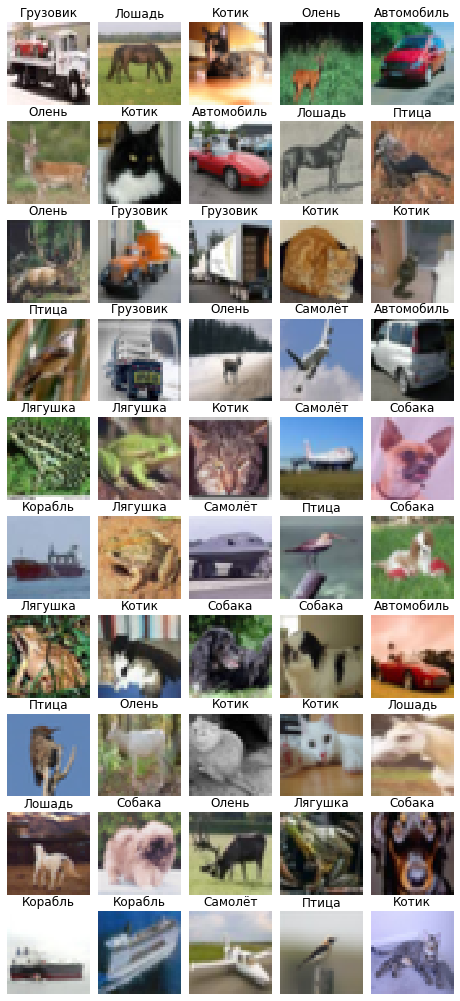

In [76]:
fig, ax = plt.subplots(nrows=10, ncols=len(indices_of_train_images) // 10)
for i, j in enumerate(indices_of_train_images):
    ax[i % 10, i // 10].imshow(x_train[j])
    ax[i % 10, i // 10].set_title(label_names[y_train[j][0]])
    ax[i % 10, i // 10].set_axis_off()
plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
fig.set_figwidth(8)
fig.set_figheight(18)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=RANDOM_SEED)

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Reshape
from keras.initializers import he_uniform, glorot_uniform
from keras.callbacks import EarlyStopping
from keras.utils import print_summary
import numpy as np

In [93]:
mlp = Sequential()
mlp.add(Reshape(input_shape=x_train.shape[1:], target_shape=(np.prod(x_train.shape[1:]),), name='FlattenFor2dImage'))
mlp.add(Dense(units=1000, kernel_initializer=he_uniform(seed=RANDOM_SEED), activation='relu', name='HiddenLayer1'))
mlp.add(Dropout(rate=0.5, seed=RANDOM_SEED, name='Dropout1'))
mlp.add(Dense(units=700, kernel_initializer=he_uniform(seed=RANDOM_SEED), activation='relu', name='HiddenLayer2'))
mlp.add(Dropout(rate=0.5, seed=RANDOM_SEED, name='Dropout2'))
mlp.add(Dense(units=10, kernel_initializer=glorot_uniform(seed=RANDOM_SEED), activation='softmax', name='OutputLayer'))
mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print_summary(mlp)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FlattenFor2dImage (Reshape)  (None, 3072)              0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 1000)              3073000   
_________________________________________________________________
Dropout1 (Dropout)           (None, 1000)              0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 700)               700700    
_________________________________________________________________
Dropout2 (Dropout)           (None, 700)               0         
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                7010      
Total params: 3,780,710
Trainable params: 3,780,710
Non-trainable params: 0
_________________________________________________________________


In [109]:
BATCH_SIZE = 128
mlp.fit(x_train / 255.0, y_train, batch_size=BATCH_SIZE, validation_data=(x_val / 255.0, y_val), shuffle=True, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)], verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 7s 152us/step - loss: 2.0218 - acc: 0.2263 - val_loss: 1.9998 - val_acc: 0.2776
Epoch 2/100
45000/45000 [==============================] - 5s 104us/step - loss: 2.0120 - acc: 0.2330 - val_loss: 1.9961 - val_acc: 0.2746
Epoch 3/100
45000/45000 [==============================] - 5s 106us/step - loss: 2.0076 - acc: 0.2357 - val_loss: 1.9772 - val_acc: 0.3004
Epoch 4/100
45000/45000 [==============================] - 5s 101us/step - loss: 2.0055 - acc: 0.2411 - val_loss: 1.9962 - val_acc: 0.2776
Epoch 5/100
45000/45000 [==============================] - 5s 102us/step - loss: 2.0024 - acc: 0.2407 - val_loss: 2.0112 - val_acc: 0.2940
Epoch 6/100
45000/45000 [==============================] - 4s 94us/step - loss: 1.9959 - acc: 0.2422 - val_loss: 2.0098 - val_acc: 0.2822
Epoch 7/100
45000/45000 [==============================] - 4s 94us/step - loss: 1.9895 - acc: 0.2475 - val_loss: 1.994

In [110]:
y_pred = np.argmax(mlp.predict(x_test / 255.0, batch_size=128), axis=-1)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_names, digits=4))

              precision    recall  f1-score   support

     Самолёт     0.4294    0.3920    0.4098      1000
  Автомобиль     0.4552    0.1320    0.2047      1000
       Птица     0.1429    0.0010    0.0020      1000
       Котик     0.1538    0.1140    0.1310      1000
       Олень     0.2618    0.3830    0.3110      1000
      Собака     0.3898    0.2740    0.3218      1000
     Лягушка     0.2674    0.4580    0.3376      1000
      Лошадь     0.2561    0.3860    0.3079      1000
     Корабль     0.4631    0.2570    0.3305      1000
    Грузовик     0.3083    0.6500    0.4183      1000

    accuracy                         0.3047     10000
   macro avg     0.3128    0.3047    0.2775     10000
weighted avg     0.3128    0.3047    0.2775     10000



In [112]:
mlp_with_augmentation = Sequential()
mlp_with_augmentation.add(Reshape(input_shape=x_train.shape[1:], target_shape=(np.prod(x_train.shape[1:]),), name='FlattenFor2dImage'))
mlp_with_augmentation.add(Dense(units=1000, kernel_initializer=he_uniform(seed=RANDOM_SEED), activation='relu', name='HiddenLayer1'))
mlp_with_augmentation.add(Dropout(rate=0.5, seed=RANDOM_SEED, name='Dropout1'))
mlp_with_augmentation.add(Dense(units=700, kernel_initializer=he_uniform(seed=RANDOM_SEED), activation='relu', name='HiddenLayer2'))
mlp_with_augmentation.add(Dropout(rate=0.5, seed=RANDOM_SEED, name='Dropout2'))
mlp_with_augmentation.add(Dense(units=10, kernel_initializer=glorot_uniform(seed=RANDOM_SEED), activation='softmax', name='OutputLayer'))
mlp_with_augmentation.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print_summary(mlp_with_augmentation)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FlattenFor2dImage (Reshape)  (None, 3072)              0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 1000)              3073000   
_________________________________________________________________
Dropout1 (Dropout)           (None, 1000)              0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 700)               700700    
_________________________________________________________________
Dropout2 (Dropout)           (None, 700)               0         
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                7010      
Total params: 3,780,710
Trainable params: 3,780,710
Non-trainable params: 0
_________________________________________________________________


In [113]:
from keras.preprocessing.image import ImageDataGenerator
cifar10_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0
)
cifar10_datagen.fit(x_train / 255.0)

In [114]:
mlp_with_augmentation.fit_generator(generator=cifar10_datagen.flow(x_train / 255.0, y_train, batch_size=BATCH_SIZE, shuffle=True), steps_per_epoch=x_train.shape[0] // BATCH_SIZE, validation_data=(x_val / 255.0, y_val), shuffle=True, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)], verbose=1)

Epoch 1/100
351/351 [==============================] - 19s 54ms/step - loss: 2.2142 - acc: 0.1866 - val_loss: 2.0274 - val_acc: 0.2450
Epoch 2/100
351/351 [==============================] - 19s 53ms/step - loss: 2.0870 - acc: 0.2079 - val_loss: 2.0186 - val_acc: 0.2404
Epoch 3/100
351/351 [==============================] - 19s 53ms/step - loss: 2.0561 - acc: 0.2195 - val_loss: 1.9895 - val_acc: 0.2520
Epoch 4/100
351/351 [==============================] - 18s 52ms/step - loss: 2.0327 - acc: 0.2295 - val_loss: 1.9877 - val_acc: 0.2768
Epoch 5/100
351/351 [==============================] - 18s 51ms/step - loss: 2.0263 - acc: 0.2299 - val_loss: 1.9861 - val_acc: 0.2806
Epoch 6/100
351/351 [==============================] - 18s 53ms/step - loss: 2.0142 - acc: 0.2363 - val_loss: 1.9829 - val_acc: 0.2754
Epoch 7/100
351/351 [==============================] - 18s 52ms/step - loss: 2.0066 - acc: 0.2394 - val_loss: 1.9844 - val_acc: 0.2934
Epoch 8/100
351/351 [==============================] - 

In [115]:
y_pred = np.argmax(mlp_with_augmentation.predict(x_test / 255.0, batch_size=128), axis=-1)

In [116]:
print(classification_report(y_test, y_pred, target_names=label_names, digits=4))

              precision    recall  f1-score   support

     Самолёт     0.0000    0.0000    0.0000      1000
  Автомобиль     0.4094    0.5400    0.4657      1000
       Птица     0.1429    0.0010    0.0020      1000
       Котик     0.1834    0.3810    0.2476      1000
       Олень     0.3316    0.3170    0.3241      1000
      Собака     0.4509    0.2020    0.2790      1000
     Лягушка     0.2771    0.4930    0.3548      1000
      Лошадь     0.3375    0.3550    0.3460      1000
     Корабль     0.3478    0.5060    0.4122      1000
    Грузовик     0.3164    0.2870    0.3010      1000

    accuracy                         0.3082     10000
   macro avg     0.2797    0.3082    0.2733     10000
weighted avg     0.2797    0.3082    0.2733     10000



/home/user/python_environments/tensorflow_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
from keras.layers import Flatten, Conv2D, MaxPooling2D, SpatialDropout2D

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:],
               kernel_initializer=he_uniform(seed=RANDOM_SEED), name='Conv_Block1_Layer1'))
cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=he_uniform(seed=RANDOM_SEED),
               name='Conv_Block1_Layer2'))
cnn.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool1'))
cnn.add(SpatialDropout2D(rate=0.15, name='SpatialDropout1', seed=RANDOM_SEED))

cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=he_uniform(seed=RANDOM_SEED),
              name='Conv_Block2_Layer1'))
cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_uniform(seed=RANDOM_SEED),
               name='Conv_Block2_Layer2'))
cnn.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool2'))
cnn.add(SpatialDropout2D(rate=0.15, name='SpatialDropout2', seed=RANDOM_SEED))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu', kernel_initializer=he_uniform(seed=RANDOM_SEED), name='HiddenLayer'))
cnn.add(Dropout(rate=0.5, seed=RANDOM_SEED, name='DropoutAfterHidden'))
cnn.add(Dense(10, activation='softmax', kernel_initializer=glorot_uniform(seed=RANDOM_SEED), name='OutputLayer'))
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print_summary(cnn)

W1115 16:02:50.587021 140319269472000 deprecation_wrapper.py:119] From /home/user/python_environments/tensorflow_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Block1_Layer1 (Conv2D)  (None, 32, 32, 32)        896       
_________________________________________________________________
Conv_Block1_Layer2 (Conv2D)  (None, 30, 30, 32)        9248      
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 15, 15, 32)        0         
_________________________________________________________________
SpatialDropout1 (SpatialDrop (None, 15, 15, 32)        0         
_________________________________________________________________
Conv_Block2_Layer1 (Conv2D)  (None, 15, 15, 64)        18496     
_________________________________________________________________
Conv_Block2_Layer2 (Conv2D)  (None, 13, 13, 64)        36928     
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 6, 6, 64)          0         
__________

In [118]:
cnn.fit(x_train / 255.0, y_train, batch_size=BATCH_SIZE, validation_data=(x_val / 255.0, y_val), shuffle=True, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)], verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 13s 285us/step - loss: 1.6806 - acc: 0.3918 - val_loss: 1.2545 - val_acc: 0.5544
Epoch 2/100
45000/45000 [==============================] - 9s 203us/step - loss: 1.2471 - acc: 0.5604 - val_loss: 1.0387 - val_acc: 0.6328
Epoch 3/100
45000/45000 [==============================] - 9s 206us/step - loss: 1.0630 - acc: 0.6278 - val_loss: 0.9185 - val_acc: 0.6722
Epoch 4/100
45000/45000 [==============================] - 9s 207us/step - loss: 0.9547 - acc: 0.6663 - val_loss: 0.8382 - val_acc: 0.7064
Epoch 5/100
45000/45000 [==============================] - 10s 211us/step - loss: 0.8694 - acc: 0.6966 - val_loss: 0.7919 - val_acc: 0.7222
Epoch 6/100
45000/45000 [==============================] - 10s 213us/step - loss: 0.8025 - acc: 0.7192 - val_loss: 0.7558 - val_acc: 0.7388
Epoch 7/100
45000/45000 [==============================] - 10s 212us/step - loss: 0.7415 - acc: 0.7410 - val_loss:

In [119]:
y_pred = np.argmax(cnn.predict(x_test / 255.0, batch_size=128), axis=-1)

In [120]:
print(classification_report(y_test, y_pred, target_names=label_names, digits=4))

              precision    recall  f1-score   support

     Самолёт     0.7919    0.8260    0.8086      1000
  Автомобиль     0.8415    0.9080    0.8735      1000
       Птица     0.7353    0.6140    0.6692      1000
       Котик     0.5917    0.5580    0.5744      1000
       Олень     0.7059    0.7370    0.7211      1000
      Собака     0.6507    0.6780    0.6641      1000
     Лягушка     0.8213    0.8270    0.8241      1000
      Лошадь     0.8075    0.8140    0.8108      1000
     Корабль     0.8631    0.8510    0.8570      1000
    Грузовик     0.8282    0.8390    0.8336      1000

    accuracy                         0.7652     10000
   macro avg     0.7637    0.7652    0.7636     10000
weighted avg     0.7637    0.7652    0.7636     10000



In [121]:
cnn_with_augmentation = Sequential()
cnn_with_augmentation.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:],
                                 kernel_initializer=he_uniform(seed=RANDOM_SEED), name='Conv_Block1_Layer1'))
cnn_with_augmentation.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=he_uniform(seed=RANDOM_SEED),
                                 name='Conv_Block1_Layer2'))
cnn_with_augmentation.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool1'))
cnn_with_augmentation.add(SpatialDropout2D(rate=0.15, name='SpatialDropout1', seed=RANDOM_SEED))
cnn_with_augmentation.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                                 kernel_initializer=he_uniform(seed=RANDOM_SEED), name='Conv_Block2_Layer1'))
cnn_with_augmentation.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_uniform(seed=RANDOM_SEED),
                                 name='Conv_Block2_Layer2'))
cnn_with_augmentation.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool2'))
cnn_with_augmentation.add(SpatialDropout2D(rate=0.15, name='SpatialDropout2', seed=RANDOM_SEED))
cnn_with_augmentation.add(Flatten())
cnn_with_augmentation.add(Dense(512, activation='relu', kernel_initializer=he_uniform(seed=RANDOM_SEED),
                                name='HiddenLayer'))
cnn_with_augmentation.add(Dropout(rate=0.5, seed=RANDOM_SEED, name='DropoutAfterHidden'))
cnn_with_augmentation.add(Dense(10, activation='softmax', kernel_initializer=glorot_uniform(seed=RANDOM_SEED),
                                name='OutputLayer'))
cnn_with_augmentation.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print_summary(cnn_with_augmentation)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Block1_Layer1 (Conv2D)  (None, 32, 32, 32)        896       
_________________________________________________________________
Conv_Block1_Layer2 (Conv2D)  (None, 30, 30, 32)        9248      
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 15, 15, 32)        0         
_________________________________________________________________
SpatialDropout1 (SpatialDrop (None, 15, 15, 32)        0         
_________________________________________________________________
Conv_Block2_Layer1 (Conv2D)  (None, 15, 15, 64)        18496     
_________________________________________________________________
Conv_Block2_Layer2 (Conv2D)  (None, 13, 13, 64)        36928     
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 6, 6, 64)          0         
__________

In [122]:
cnn_with_augmentation.fit_generator(generator=cifar10_datagen.flow(x_train / 255.0, y_train, batch_size=BATCH_SIZE, shuffle=True), steps_per_epoch=x_train.shape[0] // BATCH_SIZE, validation_data=(x_val / 255.0, y_val), shuffle=True, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)], verbose=1)

Epoch 1/100
351/351 [==============================] - 19s 55ms/step - loss: 1.7453 - acc: 0.3661 - val_loss: 1.3147 - val_acc: 0.5140
Epoch 2/100
351/351 [==============================] - 19s 53ms/step - loss: 1.4038 - acc: 0.4962 - val_loss: 1.1235 - val_acc: 0.5960
Epoch 3/100
351/351 [==============================] - 19s 54ms/step - loss: 1.2594 - acc: 0.5532 - val_loss: 1.0396 - val_acc: 0.6374
Epoch 4/100
351/351 [==============================] - 18s 51ms/step - loss: 1.1531 - acc: 0.5908 - val_loss: 0.9168 - val_acc: 0.6698
Epoch 5/100
351/351 [==============================] - 18s 51ms/step - loss: 1.0800 - acc: 0.6177 - val_loss: 0.8714 - val_acc: 0.6914
Epoch 6/100
351/351 [==============================] - 18s 52ms/step - loss: 1.0196 - acc: 0.6432 - val_loss: 0.8426 - val_acc: 0.6978
Epoch 7/100
351/351 [==============================] - 19s 54ms/step - loss: 0.9780 - acc: 0.6580 - val_loss: 0.8018 - val_acc: 0.7218
Epoch 8/100
351/351 [==============================] - 

In [123]:
y_pred = np.argmax(cnn_with_augmentation.predict(x_test / 255.0, batch_size=128), axis=-1)

In [124]:
print(classification_report(y_test, y_pred, target_names=label_names, digits=4))

              precision    recall  f1-score   support

     Самолёт     0.8298    0.8530    0.8412      1000
  Автомобиль     0.8743    0.9530    0.9120      1000
       Птица     0.8508    0.6560    0.7408      1000
       Котик     0.6803    0.6490    0.6643      1000
       Олень     0.7870    0.8090    0.7978      1000
      Собака     0.7480    0.7390    0.7435      1000
     Лягушка     0.7977    0.9110    0.8506      1000
      Лошадь     0.8556    0.8710    0.8632      1000
     Корабль     0.8847    0.8900    0.8873      1000
    Грузовик     0.8974    0.8750    0.8861      1000

    accuracy                         0.8206     10000
   macro avg     0.8206    0.8206    0.8187     10000
weighted avg     0.8206    0.8206    0.8187     10000

